In [1]:
import pandas as pd
TARGET_7=pd.read_csv("TARGET_7.csv")
TARGET_7.index=TARGET_7.iloc[:,0]
TARGET_7=TARGET_7.iloc[:,1:80]

In [2]:
INPUT_EXP_7=pd.read_csv("INPUT_EXP_7.csv")
INPUT_EXP_7.index=INPUT_EXP_7.iloc[:,0]
INPUT_EXP_7=INPUT_EXP_7.iloc[:,1:80]

In [3]:
df=pd.concat([INPUT_EXP_7,TARGET_7],axis=1)

In [4]:
import torch
import torch.nn as nn
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
df_shuffled = shuffle(df, random_state=42)

In [5]:
#CALCOLO KL DIVERGENCE PRE AGGIUSTAMENTO
import numpy as np
D_KL=np.zeros(902)
for i in range(902):
  D_KL[i]=np.sum(TARGET_7.iloc[i,:]*np.log(TARGET_7.iloc[i,:]/INPUT_EXP_7.iloc[i,:]))

In [6]:
np.mean(D_KL)

8.97770430328756

In [7]:
input_matrix=df_shuffled.iloc[:,0:79]

In [8]:
target=df_shuffled.iloc[:,79:158]

In [9]:
seed = 42
torch.manual_seed(seed)
np.random.seed(seed)

TEST_OUTPUTS={}
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NeuralNetwork, self).__init__()
        self.hidden_layer = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.output_layer = nn.Linear(hidden_size, output_size)
        self.log_softmax = nn.LogSoftmax(dim=1)

    def forward(self, x):
        x = self.hidden_layer(x)
        x = self.relu(x)
        x = self.output_layer(x)
        x = self.log_softmax(x)
        return x

input_size = 79
hidden_size = 128
output_size = 79


input_data = torch.tensor(input_matrix.values).float()
output_data = torch.tensor(target.values)


input_data_numpy = input_data.numpy()
output_data_numpy = output_data.numpy()

loo = LeaveOneOut()
total_samples = len(input_data)
errors=[]
z=0
for train_index, test_index in loo.split(input_data):
    # Training set e test set
    torch.manual_seed(seed)
    np.random.seed(seed)
    net = NeuralNetwork(input_size, hidden_size, output_size)
    criterion = nn.KLDivLoss(reduction='batchmean')
    optimizer = torch.optim.Adam(net.parameters(), lr=0.001)
    X_train, X_test = input_data_numpy[train_index], input_data_numpy[test_index]
    y_train, y_test = output_data_numpy[train_index], output_data_numpy[test_index]

    # Addestramento
    for epoch in range(1000):
        optimizer.zero_grad()
        outputs = net(torch.tensor(X_train).float())
        loss = criterion(outputs, torch.tensor(y_train))
        loss.backward()
        optimizer.step()

    # Valutazione
    test_outputs = net(torch.tensor(X_test).float())
    test_loss = criterion(test_outputs, torch.tensor(y_test))
    TEST_OUTPUTS[z]=torch.exp(test_outputs)
    z=z+1
    errors.append(test_loss.item())


average_error = sum(errors) / len(errors)
print(f'Media degli errori: {average_error}')

Media degli errori: 0.7032771161610198


VALIDATION 1 BRCA ->72

In [10]:
input_val=INPUT_EXP_7.iloc[0:72,:]
target_val=TARGET_7.iloc[0:72,:]

In [11]:
df=pd.concat([INPUT_EXP_7.iloc[72:902,:],TARGET_7.iloc[72:902,:]],axis=1)

In [12]:
df_shuffled = shuffle(df, random_state=42)

In [13]:
input_matrix=df_shuffled.iloc[:,0:79]

In [14]:
target=df_shuffled.iloc[:,79:158]

In [15]:
seed = 42
torch.manual_seed(seed)
np.random.seed(seed)
import torch
import torch.nn as nn

# Definisci la tua rete neurale
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NeuralNetwork, self).__init__()
        self.hidden_layer = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.output_layer = nn.Linear(hidden_size, output_size)
        self.log_softmax = nn.LogSoftmax(dim=1)  # Usa LogSoftmax per ottenere log-probabilità

    def forward(self, x):
        x = self.hidden_layer(x)
        x = self.relu(x)
        x = self.output_layer(x)
        x = self.log_softmax(x)
        return x

# Parametri della rete
input_size = 79
hidden_size = 128
output_size = 79
torch.manual_seed(seed)
np.random.seed(seed)
# Crea l'istanza della rete
net = NeuralNetwork(input_size, hidden_size, output_size)

criterion = nn.KLDivLoss(reduction='batchmean')
optimizer = torch.optim.Adam(net.parameters(), lr=0.001)

# I dati di input e output
# Supponendo che i tuoi dati siano tensori PyTorch, assicurati di adattare questa parte in base al tuo caso specifico
input_data = torch.tensor(input_matrix.values).float()
output_data = torch.tensor(target.values)

# Addestramento della rete
for epoch in range(1000):
    optimizer.zero_grad()
    outputs = net(input_data)
    loss = criterion(outputs, output_data)
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print(f'Epoch {epoch+1}/{1000}, Loss: {loss.item()}')



Epoch 1/1000, Loss: 1.8253235705163715
Epoch 11/1000, Loss: 1.779273695364455
Epoch 21/1000, Loss: 1.7241637663595561
Epoch 31/1000, Loss: 1.6529123960293
Epoch 41/1000, Loss: 1.567081933625856
Epoch 51/1000, Loss: 1.477766363234655
Epoch 61/1000, Loss: 1.4002708523717342
Epoch 71/1000, Loss: 1.3424369470548638
Epoch 81/1000, Loss: 1.298106047891312
Epoch 91/1000, Loss: 1.2573826272065902
Epoch 101/1000, Loss: 1.2153590616624912
Epoch 111/1000, Loss: 1.1699463510920143
Epoch 121/1000, Loss: 1.1214387182467542
Epoch 131/1000, Loss: 1.0711445649308633
Epoch 141/1000, Loss: 1.0208262321085437
Epoch 151/1000, Loss: 0.9724767907492065
Epoch 161/1000, Loss: 0.9277783831541218
Epoch 171/1000, Loss: 0.8877142025531788
Epoch 181/1000, Loss: 0.8525875255525324
Epoch 191/1000, Loss: 0.8221584354829868
Epoch 201/1000, Loss: 0.7960158758007962
Epoch 211/1000, Loss: 0.7735907534726367
Epoch 221/1000, Loss: 0.7543335132002645
Epoch 231/1000, Loss: 0.7377166781836667
Epoch 241/1000, Loss: 0.7232993077

In [16]:
input_data_VAL = torch.tensor(input_val.values).float()

In [17]:
OUTPUT_VAL=net(input_data_VAL)

In [18]:
OUTPUT_VAL_ex= torch.exp(OUTPUT_VAL)

In [19]:
OUTPUT_VAL_PD=pd.DataFrame(OUTPUT_VAL_ex.detach().numpy())

In [20]:
OUTPUT_VAL_PD.columns=TARGET_7.columns
OUTPUT_VAL_PD.index=input_val.index

In [21]:
#CALCOLO KL DIVERGENCE PRE AGGIUSTAMENTO
D_KL=np.zeros(72)
for i in range(72):
  D_KL[i]=np.sum(target_val.iloc[i,:]*np.log(target_val.iloc[i,:]/INPUT_EXP_7.iloc[i,:]))

In [22]:
np.mean(D_KL)

9.759401646816425

In [23]:
D_KL_ANN=np.zeros(72)
for i in range(72):
  D_KL_ANN[i]=np.sum(target_val.iloc[i,:]*np.log(target_val.iloc[i,:]/OUTPUT_VAL_PD.iloc[i,:]))

In [24]:
np.mean(D_KL_ANN)

0.7452622275690683

In [25]:
COSMIC_SIGNATURE=pd.read_csv('/content/COSMIC_SIGNATURE.txt',sep='\t')

In [26]:
COSMIC_SIGNATURE = COSMIC_SIGNATURE.rename(index={idx: name for idx, name in zip(COSMIC_SIGNATURE.index,COSMIC_SIGNATURE.iloc[:,0])})

In [27]:
COSMIC_SIGNATURE=COSMIC_SIGNATURE.iloc[:,1:80]

In [28]:
mutazioni_96=COSMIC_SIGNATURE.index.to_list()

In [29]:
posizioni_desiderate = [0, 4, 6]  # Posizioni delle lettere da estrarre

In [30]:
triplette_96=["NA"] * 96

In [31]:
#per risalire a triplette
for j in range(len(mutazioni_96)):
  triplette_96[j]=(''.join([mutazioni_96[j][i] for i in posizioni_desiderate]))


In [32]:
triplette_WE={
"AAA": 971543,
"AAC": 457937,
"AAG": 683449,
"AAT": 613659,
"ACA": 645172,
"ACC": 467461,
"ACG": 166834,
"ACT": 522169,
"AGA": 733161,
"AGC": 633194,
"AGG": 732167,
"AGT": 517622,
"ATA": 452047,
"ATC": 433601,
"ATG": 570462,
"ATT": 617871,
"CAA": 618247,
"CAC": 589351,
"CAG": 903792,
"CAT": 608159,
"CCA": 804743,
"CCC": 688716,
"CCG": 302071,
"CCT": 828509,
"CGA": 175264,
"CGC": 262799,
"CGG": 296517,
"CGT": 173362,
"CTA": 347395,
"CTC": 675140,
"CTG": 889111,
"CTT": 700889,
"GAA": 705840,
"GAC": 423424,
"GAG": 709204,
"GAT": 464568,
"GCA": 632684,
"GCC": 658721,
"GCG": 261926,
"GCT": 662238,
"GGA": 718540,
"GGC": 675179,
"GGG": 695185,
"GGT": 495737,
"GTA": 331134,
"GTC": 415338,
"GTG": 593450,
"GTT": 475249,
"TAA": 495405,
"TAC": 334514,
"TAG": 338906,
"TAT": 470135,
"TCA": 671563,
"TCC": 678613,
"TCG": 167328,
"TCT": 758038,
"TGA": 666395,
"TGC": 610982,
"TGG": 768587,
"TGT": 656330,
"TTA": 495270,
"TTC": 669495,
"TTG": 588421,
"TTT": 970870}

In [33]:
somma_valori_tripletteWE = sum(triplette_WE.values())

In [34]:
for key in triplette_WE:
    triplette_WE[key] /= somma_valori_tripletteWE

In [35]:
triplette_WG={
    'AAA': 38111156,
         'AAC': 14477650,
         'AAG': 19838087,
         'AAT': 24726104,
         'ACA': 20058100,
         'ACC': 11637985,
         'ACG': 2522576,
         'ACT': 16006323,
         'AGA': 22032850,
         'AGC': 13971789,
         'AGG': 17784375,
         'AGT': 16027165,
         'ATA': 20424450,
         'ATC': 13297469,
         'ATG': 18289096,
         'ATT': 24744309,
         'CAA': 18821687,
         'CAC': 15021434,
         'CAG': 20277838,
         'CAT': 18270059,
         'CCA': 18438491,
         'CCC': 13225895,
         'CCG': 2797677,
         'CCT': 17793617,
         'CGA': 2222992,
         'CGC': 2410618,
         'CGG': 2800948,
         'CGT': 2525426,
         'CTA': 12811080,
         'CTC': 16861443,
         'CTG': 20285307,
         'CTT': 19864832,
         'GAA': 19623577,
         'GAC': 9440460,
         'GAG': 16869395,
         'GAT': 13313709,
         'GCA': 14374147,
         'GCC': 11956723,
         'GCG': 2411316,
         'GCT': 13973363,
         'GGA': 15471216,
         'GGC': 11947940,
         'GGG': 13230267,
         'GGT': 11641887,
         'GTA': 11280782,
         'GTC': 9460393,
         'GTG': 15052446,
         'GTT': 14529889,
         'TAA': 20594734,
         'TAC': 11276596,
         'TAG': 12829959,
         'TAT': 20439748,
         'TCA': 19511980,
         'TCC': 15450553,
         'TCG': 2228508,
         'TCT': 22050472,
         'TGA': 19524235,
         'TGC': 14389204,
         'TGG': 18494922,
         'TGT': 20115781,
         'TTA': 20618925,
         'TTC': 19636248,
         'TTG': 18882367,
         'TTT': 38233904
}

In [36]:
somma_valori_tripletteWG = sum(triplette_WG.values())

In [37]:
for key in triplette_WG:
    triplette_WG[key] /= somma_valori_tripletteWG

In [38]:
rapporti = {key: triplette_WG[key] / triplette_WE[key] for key in triplette_WG if key in triplette_WE}

In [39]:
MATRIX_7=pd.read_csv("MATRIX_7.csv")
MATRIX_7.index=MATRIX_7.index
MATRIX_7=MATRIX_7.iloc[:,1:97]

In [40]:
MATRIX_adjusted_VAL=MATRIX_7.iloc[0:72,:].copy()

In [41]:
for i in range(MATRIX_adjusted_VAL.shape[1]):
  MATRIX_adjusted_VAL.iloc[:,i]=(MATRIX_7.iloc[0:72,i]*rapporti[triplette_96[i]])+np.mean(MATRIX_7.iloc[0:72,i])

In [42]:
MATRIX_adjusted_VAL=MATRIX_adjusted_VAL.T

In [43]:
# Calcolare la somma di ogni colonna
sum_columns =MATRIX_adjusted_VAL.sum()

In [44]:
# Normalizzare ogni colonna dividendo per la somma della colonna
MATRIX_adjusted_VAL= MATRIX_adjusted_VAL.divide(sum_columns)

In [45]:
import cvxpy as cp
import numpy as np


n, m = 79, 72
X = COSMIC_SIGNATURE.values
Y = MATRIX_adjusted_VAL.values

w = cp.Variable((n, m))

# Vincoli
constraints = [
    w >= 0,
    cp.sum(w, axis=0) == np.ones(m),

]



# (minimizzazione degli scarti quadratici)
objective = cp.Minimize(cp.norm(Y - X @ w , 'fro')+0.01*cp.norm(w, 1))

problem = cp.Problem(objective, constraints)

problem.solve()

coefficients_WE_adj_VAL = w.value
print("Coefficients:", coefficients_WE_adj_VAL)

Coefficients: [[1.38785113e-01 2.82299215e-02 1.14150312e-01 ... 2.92767666e-02
  1.12893145e-01 7.17882065e-02]
 [2.81621455e-01 2.82021946e-01 1.61695655e-01 ... 3.01369569e-01
  1.37746583e-01 1.45186470e-01]
 [5.41965575e-12 5.77247214e-13 1.10331357e-01 ... 1.46037551e-12
  1.38803481e-02 1.93645750e-12]
 ...
 [1.75197488e-12 4.16443794e-13 5.47529196e-13 ... 4.30058784e-13
  2.28465716e-02 4.49572742e-13]
 [1.78251789e-12 2.78993875e-13 9.88862781e-03 ... 3.33399762e-12
  6.73439665e-13 5.72143117e-13]
 [6.01976661e-13 2.12233066e-13 7.59097270e-13 ... 1.53477608e-12
  1.33739693e-12 7.29432103e-13]]


In [46]:
coefficients_WE_adj_VAL=pd.DataFrame(coefficients_WE_adj_VAL)

In [47]:
coefficients_WE_adj_VAL.index=COSMIC_SIGNATURE.columns

In [48]:
coefficients_WE_adj_VAL.columns=MATRIX_adjusted_VAL.columns

In [49]:
coefficients_WE_adj_VAL

,0,1,2,3,4,5,6,7,8,9,...,62,63,64,65,66,67,68,69,70,71
SBS1,1.387851e-01,2.822992e-02,1.141503e-01,9.466669e-02,6.199045e-02,2.137931e-01,5.252583e-02,3.126623e-02,1.086042e-01,2.833567e-02,...,9.668071e-02,8.275261e-02,5.977342e-02,1.595915e-01,4.338929e-02,6.440306e-02,4.281994e-02,2.927677e-02,1.128931e-01,7.178821e-02
SBS2,2.816215e-01,2.820219e-01,1.616957e-01,1.669857e-01,1.874155e-01,1.488364e-01,1.346629e-01,1.506022e-01,2.163554e-01,3.504434e-01,...,1.517361e-01,1.617161e-01,1.309071e-01,1.726865e-01,2.374081e-01,2.517529e-01,9.938141e-02,3.013696e-01,1.377466e-01,1.451865e-01
SBS3,5.419656e-12,5.772472e-13,1.103314e-01,1.314939e-11,6.235956e-11,6.888773e-02,1.950891e-12,6.775883e-12,3.268122e-12,3.294453e-03,...,6.373986e-02,5.206804e-12,1.802461e-12,2.034284e-12,3.050751e-12,2.943406e-12,1.417927e-11,1.460376e-12,1.388035e-02,1.936457e-12
SBS4,1.099627e-12,2.411768e-13,1.264230e-11,1.912006e-12,1.283874e-12,3.738505e-12,1.010782e-12,8.380147e-13,2.384535e-12,6.712346e-12,...,3.618930e-03,1.360275e-02,4.966215e-13,7.274094e-13,7.925128e-13,4.872676e-12,1.905796e-02,5.894760e-04,2.940004e-12,8.281355e-13
SBS5,1.890206e-12,3.971153e-13,2.560556e-11,1.282356e-11,1.491743e-12,8.358329e-13,1.148523e-11,9.812266e-03,1.796643e-12,1.312554e-12,...,2.909840e-12,2.404681e-12,1.438940e-12,2.597537e-12,1.470193e-12,1.812324e-12,3.871517e-11,7.056552e-13,1.664052e-12,2.642753e-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SBS91,2.150528e-11,4.551050e-14,1.494790e-13,6.326503e-03,3.662603e-03,8.230262e-14,9.371065e-13,6.822411e-13,3.348900e-13,1.254319e-03,...,4.844106e-13,1.932620e-02,1.352008e-13,1.595217e-03,8.739585e-03,1.750800e-12,1.627906e-13,1.032364e-02,4.546187e-03,1.132153e-13
SBS92,1.162191e-12,2.878904e-13,7.401706e-13,1.046610e-12,1.186741e-12,7.967576e-13,2.020351e-12,7.757392e-13,5.218998e-13,2.754603e-12,...,9.279656e-13,1.919193e-12,6.639284e-13,1.704208e-12,1.578888e-12,1.946084e-12,1.681403e-12,1.099494e-12,1.248637e-12,1.063065e-12
SBS93,1.751975e-12,4.164438e-13,5.475292e-13,4.274988e-13,6.966032e-13,6.713139e-13,5.045046e-13,7.164281e-13,6.212032e-12,1.271076e-12,...,1.071760e-12,4.663850e-13,7.344178e-13,8.928360e-13,4.757607e-13,2.157445e-12,4.824013e-02,4.300588e-13,2.284657e-02,4.495727e-13
SBS94,1.782518e-12,2.789939e-13,9.888628e-03,1.475907e-12,6.371398e-13,1.398234e-11,4.151974e-13,6.581080e-13,3.796394e-13,1.169388e-02,...,1.672572e-12,4.674907e-13,2.267109e-13,4.847396e-13,1.038817e-12,4.207541e-13,8.128147e-13,3.333998e-12,6.734397e-13,5.721431e-13


In [50]:
##BOXPLOT DELLE VARIE DIFFERENZE in termini di KL DIVERGENCE
D_ADJ_val=np.zeros(72)
for i in range(72):
  D_ADJ_val[i]=np.sum(target_val.iloc[i,:]*np.log(target_val.iloc[i,:]/coefficients_WE_adj_VAL.iloc[:,i]))
np.mean(D_ADJ_val)

6.6623496977163965

In [51]:
D_kl_val=np.zeros(72)
for i in range(72):
  D_kl_val[i]=np.sum(target_val.iloc[i,:]*np.log(target_val.iloc[i,:]/INPUT_EXP_7.iloc[i,:]))
np.mean(D_kl_val)

9.759401646816425

In [52]:
D_kl_ann_val=np.zeros(72)
for i in range(72):
  D_kl_ann_val[i]=np.sum(target_val.iloc[i,:]*np.log(target_val.iloc[i,:]/OUTPUT_VAL_PD.iloc[i,:]))
np.mean(D_kl_ann_val)

0.7452622275690683

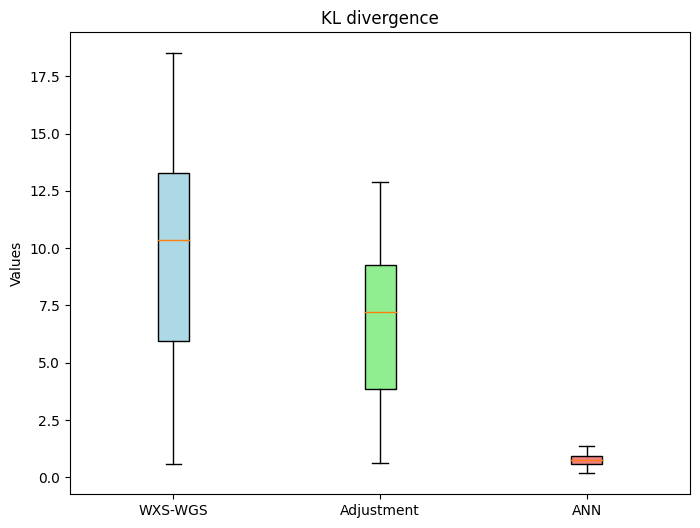

In [53]:
# Creazione della figura e degli assi
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 6))

# Creazione dei boxplot
boxplot1 = ax.boxplot(D_kl_val, positions=[1], patch_artist=True)
boxplot2 = ax.boxplot(D_ADJ_val, positions=[2], patch_artist=True)
boxplot3 = ax.boxplot(D_kl_ann_val, positions=[3], patch_artist=True)

# Personalizzazione dei colori
colors = ['lightblue', 'lightgreen', 'lightcoral']
for box, color in zip([boxplot1, boxplot2, boxplot3], colors):
    for patch in box['boxes']:
        patch.set_facecolor(color)

# Aggiunta di etichette e titoli
ax.set_xticks([1, 2, 3])
ax.set_xticklabels(['WXS-WGS', 'Adjustment', 'ANN'])
ax.set_ylabel('Values')
ax.set_title('KL divergence')

# Mostrare il grafico
plt.show()

VALIDATION 2 OV -> 115

In [54]:
input_val=INPUT_EXP_7.iloc[72:187,:]
target_val=TARGET_7.iloc[72:187,:]

In [55]:
df1=pd.concat([INPUT_EXP_7.iloc[0:72,:],TARGET_7.iloc[0:72,:]],axis=1)

In [56]:
df2=pd.concat([INPUT_EXP_7.iloc[187:902,:],TARGET_7.iloc[187:902,:]],axis=1)

In [57]:
df=df1.append(df2)

<ipython-input-57-a9d981095968>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df1.append(df2)


In [58]:
df_shuffled = shuffle(df, random_state=42)

In [59]:
input_matrix=df_shuffled.iloc[:,0:79]

In [60]:
target=df_shuffled.iloc[:,79:158]

In [61]:
import torch
import torch.nn as nn
seed = 42
torch.manual_seed(seed)
np.random.seed(seed)
# Definisci la tua rete neurale
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NeuralNetwork, self).__init__()
        self.hidden_layer = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.output_layer = nn.Linear(hidden_size, output_size)
        self.log_softmax = nn.LogSoftmax(dim=1)  # Usa LogSoftmax per ottenere log-probabilità

    def forward(self, x):
        x = self.hidden_layer(x)
        x = self.relu(x)
        x = self.output_layer(x)
        x = self.log_softmax(x)
        return x

# Parametri della rete
input_size = 79
hidden_size = 128
output_size = 79
torch.manual_seed(seed)
np.random.seed(seed)
# Crea l'istanza della rete
net = NeuralNetwork(input_size, hidden_size, output_size)

criterion = nn.KLDivLoss(reduction='batchmean')
optimizer = torch.optim.Adam(net.parameters(), lr=0.001)

# I dati di input e output
# Supponendo che i tuoi dati siano tensori PyTorch, assicurati di adattare questa parte in base al tuo caso specifico
input_data = torch.tensor(input_matrix.values).float()
output_data = torch.tensor(target.values)

# Addestramento della rete
for epoch in range(1000):
    optimizer.zero_grad()
    outputs = net(input_data)
    loss = criterion(outputs, output_data)
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print(f'Epoch {epoch+1}/{1000}, Loss: {loss.item()}')



Epoch 1/1000, Loss: 1.8448942841244151
Epoch 11/1000, Loss: 1.7986799080312683
Epoch 21/1000, Loss: 1.743959520724544
Epoch 31/1000, Loss: 1.6736407917425753
Epoch 41/1000, Loss: 1.5892960148743498
Epoch 51/1000, Loss: 1.5020565427000936
Epoch 61/1000, Loss: 1.4263865570172516
Epoch 71/1000, Loss: 1.3669457222964108
Epoch 81/1000, Loss: 1.3186018083829165
Epoch 91/1000, Loss: 1.2739947493830281
Epoch 101/1000, Loss: 1.2282461397483635
Epoch 111/1000, Loss: 1.1791699679607615
Epoch 121/1000, Loss: 1.126864399022077
Epoch 131/1000, Loss: 1.0728386801187915
Epoch 141/1000, Loss: 1.019045625626265
Epoch 151/1000, Loss: 0.9675767661962852
Epoch 161/1000, Loss: 0.9202658945175809
Epoch 171/1000, Loss: 0.8782417062260216
Epoch 181/1000, Loss: 0.841703681740318
Epoch 191/1000, Loss: 0.8104617250114413
Epoch 201/1000, Loss: 0.783997129656045
Epoch 211/1000, Loss: 0.7616340871817097
Epoch 221/1000, Loss: 0.7427072554035291
Epoch 231/1000, Loss: 0.7266125667489173
Epoch 241/1000, Loss: 0.71282343

In [62]:
input_data_VAL = torch.tensor(input_val.values).float()

In [63]:
OUTPUT_VAL=net(input_data_VAL)

In [64]:
OUTPUT_VAL_ex= torch.exp(OUTPUT_VAL)

In [65]:
OUTPUT_VAL_PD=pd.DataFrame(OUTPUT_VAL_ex.detach().numpy())

In [66]:
OUTPUT_VAL_PD.columns=COSMIC_SIGNATURE.columns
OUTPUT_VAL_PD.index=input_val.index

In [67]:
#CALCOLO KL DIVERGENCE PRE AGGIUSTAMENTO
D_KL=np.zeros(115)
for i in range(115):
  D_KL[i]=np.sum(target_val.iloc[i,:]*np.log(target_val.iloc[i,:]/INPUT_EXP_7.iloc[i+72,:]))

In [68]:
np.mean(D_KL)

10.489048394994192

In [69]:
D_KL_ANN=np.zeros(115)
for i in range(115):
  D_KL_ANN[i]=np.sum(target_val.iloc[i,:]*np.log(target_val.iloc[i,:]/OUTPUT_VAL_PD.iloc[i,:]))

In [70]:
np.mean(D_KL_ANN)

0.806439967515257

METODO CORRETTIVO

In [71]:
MATRIX_adjusted_VAL=MATRIX_7.iloc[72:187,:].copy()

In [72]:
for i in range(MATRIX_adjusted_VAL.shape[1]):
  MATRIX_adjusted_VAL.iloc[:,i]=(MATRIX_7.iloc[72:187,i]*rapporti[triplette_96[i]])+np.mean(MATRIX_7.iloc[72:187,i])

In [73]:
MATRIX_adjusted_VAL=MATRIX_adjusted_VAL.T

In [74]:
# Calcolare la somma di ogni colonna
sum_columns =MATRIX_adjusted_VAL.sum()

In [75]:
# Normalizzare ogni colonna dividendo per la somma della colonna
MATRIX_adjusted_VAL= MATRIX_adjusted_VAL.divide(sum_columns)

In [76]:
import cvxpy as cp
import numpy as np


n, m = 79, 115
X = COSMIC_SIGNATURE.values
Y = MATRIX_adjusted_VAL.values

w = cp.Variable((n, m))

# Vincoli
constraints = [
    w >= 0,
    cp.sum(w, axis=0) == np.ones(m),

]



# (minimizzazione degli scarti quadratici)
objective = cp.Minimize(cp.norm(Y - X @ w , 'fro')+0.01*cp.norm(w, 1))

problem = cp.Problem(objective, constraints)

problem.solve()

coefficients_WE_adj_VAL = w.value
print("Coefficients:", coefficients_WE_adj_VAL)

Coefficients: [[2.15283348e-02 9.78551151e-03 6.70122296e-02 ... 1.01829000e-12
  3.59368914e-02 8.08618833e-02]
 [1.25838002e-02 5.12392136e-02 2.32464342e-02 ... 3.55700670e-02
  5.35647757e-03 3.77713635e-03]
 [5.04453295e-02 5.20704742e-02 2.74212273e-01 ... 1.74446111e-01
  5.56289914e-02 1.79973598e-02]
 ...
 [1.20998742e-12 1.31205271e-12 3.31284353e-13 ... 1.06761524e-02
  4.78986541e-13 5.50071561e-03]
 [1.52614534e-02 1.22472871e-12 9.08698382e-13 ... 5.30673256e-13
  3.16569899e-02 1.99839684e-12]
 [4.98669193e-13 4.76341991e-12 1.51127516e-12 ... 2.32560306e-12
  4.87127940e-13 1.11128386e-12]]


In [77]:
coefficients_WE_adj_VAL=pd.DataFrame(coefficients_WE_adj_VAL)

In [78]:
coefficients_WE_adj_VAL.index=COSMIC_SIGNATURE.columns

In [79]:
coefficients_WE_adj_VAL.columns=MATRIX_adjusted_VAL.columns

In [80]:
##BOXPLOT DELLE VARIE DIFFERENZE in termini di KL DIVERGENCE
D_ADJ_val=np.zeros(115)
for i in range(115):
  D_ADJ_val[i]=np.sum(target_val.iloc[i,:]*np.log(target_val.iloc[i,:]/coefficients_WE_adj_VAL.iloc[:,i]))
np.mean(D_ADJ_val)

5.978304575515344

In [81]:
D_kl_val=np.zeros(115)
for i in range(115):
  D_kl_val[i]=np.sum(target_val.iloc[i,:]*np.log(target_val.iloc[i,:]/INPUT_EXP_7.iloc[i+72,:]))
np.mean(D_kl_val)

10.489048394994192

In [82]:
D_kl_ann_val=np.zeros(115)
for i in range(115):
  D_kl_ann_val[i]=np.sum(target_val.iloc[i,:]*np.log(target_val.iloc[i,:]/OUTPUT_VAL_PD.iloc[i,:]))
np.mean(D_kl_ann_val)

0.806439967515257

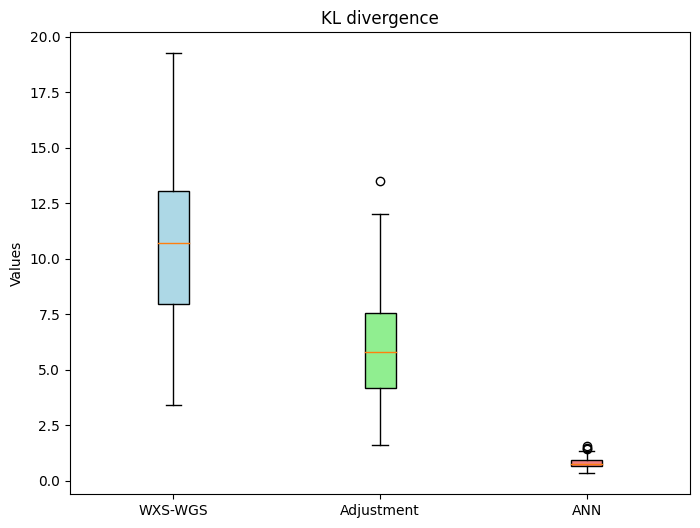

In [83]:
# Creazione della figura e degli assi
fig, ax = plt.subplots(figsize=(8, 6))

# Creazione dei boxplot
boxplot1 = ax.boxplot(D_kl_val, positions=[1], patch_artist=True)
boxplot2 = ax.boxplot(D_ADJ_val, positions=[2], patch_artist=True)
boxplot3 = ax.boxplot(D_kl_ann_val, positions=[3], patch_artist=True)

# Personalizzazione dei colori
colors = ['lightblue', 'lightgreen', 'lightcoral']
for box, color in zip([boxplot1, boxplot2, boxplot3], colors):
    for patch in box['boxes']:
        patch.set_facecolor(color)

# Aggiunta di etichette e titoli
ax.set_xticks([1, 2, 3])
ax.set_xticklabels(['WXS-WGS', 'Adjustment', 'ANN'])
ax.set_ylabel('Values')
ax.set_title('KL divergence')

# Mostrare il grafico
plt.show()

VALIDATION 3 MALY ->234

In [84]:
input_val=INPUT_EXP_7.iloc[187:421,:]
target_val=TARGET_7.iloc[187:421,:]

In [85]:
df1=pd.concat([INPUT_EXP_7.iloc[0:187,:],TARGET_7.iloc[0:187,:]],axis=1)

In [86]:
df2=pd.concat([INPUT_EXP_7.iloc[421:902,:],TARGET_7.iloc[421:902,:]],axis=1)

In [87]:
df=df1.append(df2)

<ipython-input-87-a9d981095968>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df1.append(df2)


In [88]:
df_shuffled = shuffle(df, random_state=42)

In [89]:
input_matrix=df_shuffled.iloc[:,0:79]

In [90]:
target=df_shuffled.iloc[:,79:158]

In [91]:

import torch
import torch.nn as nn

seed = 42
torch.manual_seed(seed)
np.random.seed(seed)

# Definisci la tua rete neurale
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NeuralNetwork, self).__init__()
        self.hidden_layer = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.output_layer = nn.Linear(hidden_size, output_size)
        self.log_softmax = nn.LogSoftmax(dim=1)  # Usa LogSoftmax per ottenere log-probabilità

    def forward(self, x):
        x = self.hidden_layer(x)
        x = self.relu(x)
        x = self.output_layer(x)
        x = self.log_softmax(x)
        return x

# Parametri della rete
input_size = 79
hidden_size = 128
output_size = 79
torch.manual_seed(seed)
np.random.seed(seed)
# Crea l'istanza della rete
net = NeuralNetwork(input_size, hidden_size, output_size)

criterion = nn.KLDivLoss(reduction='batchmean')
optimizer = torch.optim.Adam(net.parameters(), lr=0.001)

# I dati di input e output
# Supponendo che i tuoi dati siano tensori PyTorch, assicurati di adattare questa parte in base al tuo caso specifico
input_data = torch.tensor(input_matrix.values).float()
output_data = torch.tensor(target.values)

# Addestramento della rete
for epoch in range(1000):
    optimizer.zero_grad()
    outputs = net(input_data)
    loss = criterion(outputs, output_data)
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print(f'Epoch {epoch+1}/{1000}, Loss: {loss.item()}')



Epoch 1/1000, Loss: 1.9652316294536794
Epoch 11/1000, Loss: 1.9133853026687717
Epoch 21/1000, Loss: 1.8512940443843287
Epoch 31/1000, Loss: 1.76961373289918
Epoch 41/1000, Loss: 1.6675386149454527
Epoch 51/1000, Loss: 1.5561412395268848
Epoch 61/1000, Loss: 1.454859235949638
Epoch 71/1000, Loss: 1.3774812580308422
Epoch 81/1000, Loss: 1.3210007332750024
Epoch 91/1000, Loss: 1.2724166254637819
Epoch 101/1000, Loss: 1.223084096178603
Epoch 111/1000, Loss: 1.1703889246446788
Epoch 121/1000, Loss: 1.114694742830858
Epoch 131/1000, Loss: 1.0572434511751783
Epoch 141/1000, Loss: 0.9999951202427608
Epoch 151/1000, Loss: 0.9450734678036178
Epoch 161/1000, Loss: 0.8941976745723329
Epoch 171/1000, Loss: 0.8485521397340903
Epoch 181/1000, Loss: 0.8086255815586729
Epoch 191/1000, Loss: 0.7743004460845078
Epoch 201/1000, Loss: 0.7451425769987805
Epoch 211/1000, Loss: 0.7204699052011889
Epoch 221/1000, Loss: 0.699593716897388
Epoch 231/1000, Loss: 0.6818628895789596
Epoch 241/1000, Loss: 0.666706527

In [92]:
input_data_VAL = torch.tensor(input_val.values).float()

In [93]:
OUTPUT_VAL=net(input_data_VAL)

In [94]:
OUTPUT_VAL_ex= torch.exp(OUTPUT_VAL)

In [95]:
OUTPUT_VAL_PD=pd.DataFrame(OUTPUT_VAL_ex.detach().numpy())

In [96]:
OUTPUT_VAL_PD.columns=COSMIC_SIGNATURE.columns
OUTPUT_VAL_PD.index=input_val.index

In [97]:
#CALCOLO KL DIVERGENCE PRE AGGIUSTAMENTO
D_KL=np.zeros(234)
for i in range(234):
  D_KL[i]=np.sum(target_val.iloc[i,:]*np.log(target_val.iloc[i,:]/INPUT_EXP_7.iloc[i+187,:]))

In [98]:
np.mean(D_KL)

11.43152663233201

In [99]:
D_KL_ANN=np.zeros(234)
for i in range(234):
  D_KL_ANN[i]=np.sum(target_val.iloc[i,:]*np.log(target_val.iloc[i,:]/OUTPUT_VAL_PD.iloc[i,:]))

In [100]:
np.mean(D_KL_ANN)

1.4656544520358983

METODO CORRETTIVO

In [101]:
MATRIX_adjusted_VAL=MATRIX_7.iloc[187:421,:].copy()

In [102]:
for i in range(MATRIX_adjusted_VAL.shape[1]):
  MATRIX_adjusted_VAL.iloc[:,i]=(MATRIX_7.iloc[187:421,i]*rapporti[triplette_96[i]])+np.mean(MATRIX_7.iloc[187:421,i])

In [103]:
MATRIX_adjusted_VAL=MATRIX_adjusted_VAL.T

In [104]:
# Calcolare la somma di ogni colonna
sum_columns =MATRIX_adjusted_VAL.sum()

In [105]:
# Normalizzare ogni colonna dividendo per la somma della colonna
MATRIX_adjusted_VAL= MATRIX_adjusted_VAL.divide(sum_columns)

In [106]:
import cvxpy as cp
import numpy as np


n, m = 79, 234
X = COSMIC_SIGNATURE.values
Y = MATRIX_adjusted_VAL.values

w = cp.Variable((n, m))

# Vincoli
constraints = [
    w >= 0,
    cp.sum(w, axis=0) == np.ones(m),

]



# (minimizzazione degli scarti quadratici)
objective = cp.Minimize(cp.norm(Y - X @ w , 'fro')+0.01*cp.norm(w, 1))

problem = cp.Problem(objective, constraints)

problem.solve()

coefficients_WE_adj_VAL = w.value
print("Coefficients:", coefficients_WE_adj_VAL)

Coefficients: [[1.23869319e-01 8.26431748e-02 4.29606818e-02 ... 7.55329010e-02
  1.07476682e-01 1.45310192e-01]
 [1.15368574e-02 3.12829395e-02 2.14054708e-13 ... 1.18822903e-03
  1.53388219e-02 2.61768002e-02]
 [4.91226023e-11 1.05539501e-01 1.14226598e-11 ... 5.86802113e-12
  1.95637002e-02 8.84138599e-12]
 ...
 [3.39732047e-12 1.11921017e-11 7.28930394e-11 ... 3.52929675e-12
  1.79466929e-12 6.09712401e-12]
 [1.03659584e-12 7.35828974e-13 1.08616602e-12 ... 1.89695872e-11
  1.28756348e-12 8.46864156e-13]
 [1.49197648e-12 2.02405563e-12 1.10478444e-12 ... 1.43140830e-12
  9.70409265e-13 1.54685964e-12]]


In [107]:
coefficients_WE_adj_VAL=pd.DataFrame(coefficients_WE_adj_VAL)

In [108]:
coefficients_WE_adj_VAL.index=COSMIC_SIGNATURE.columns

In [109]:
coefficients_WE_adj_VAL.columns=MATRIX_adjusted_VAL.columns

In [110]:
##BOXPLOT DELLE VARIE DIFFERENZE in termini di KL DIVERGENCE
D_ADJ_val=np.zeros(234)
for i in range(234):
  D_ADJ_val[i]=np.sum(target_val.iloc[i,:]*np.log(target_val.iloc[i,:]/coefficients_WE_adj_VAL.iloc[:,i]))
np.mean(D_ADJ_val)

5.839346600580335

In [111]:
D_kl_val=np.zeros(234)
for i in range(234):
  D_kl_val[i]=np.sum(target_val.iloc[i,:]*np.log(target_val.iloc[i,:]/INPUT_EXP_7.iloc[i+187,:]))
np.mean(D_kl_val)

11.43152663233201

In [112]:
D_kl_ann_val=np.zeros(234)
for i in range(234):
  D_kl_ann_val[i]=np.sum(target_val.iloc[i,:]*np.log(target_val.iloc[i,:]/OUTPUT_VAL_PD.iloc[i,:]))
np.mean(D_kl_ann_val)

1.4656544520358983

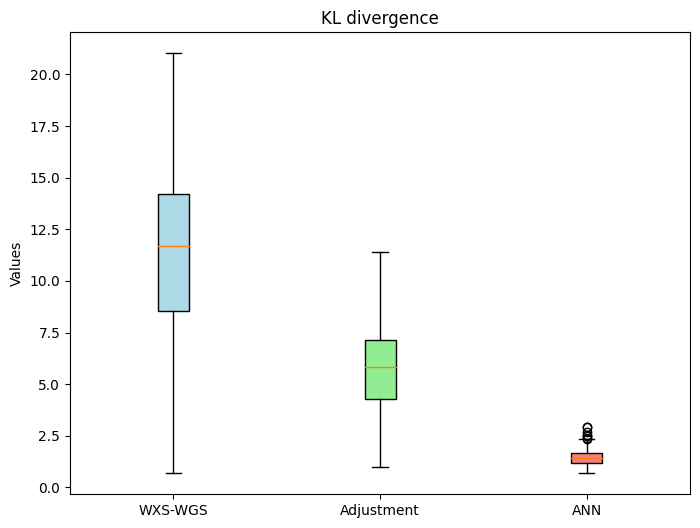

In [113]:
# Creazione della figura e degli assi
fig, ax = plt.subplots(figsize=(8, 6))

# Creazione dei boxplot
boxplot1 = ax.boxplot(D_kl_val, positions=[1], patch_artist=True)
boxplot2 = ax.boxplot(D_ADJ_val, positions=[2], patch_artist=True)
boxplot3 = ax.boxplot(D_kl_ann_val, positions=[3], patch_artist=True)

# Personalizzazione dei colori
colors = ['lightblue', 'lightgreen', 'lightcoral']
for box, color in zip([boxplot1, boxplot2, boxplot3], colors):
    for patch in box['boxes']:
        patch.set_facecolor(color)

# Aggiunta di etichette e titoli
ax.set_xticks([1, 2, 3])
ax.set_xticklabels(['WXS-WGS', 'Adjustment', 'ANN'])
ax.set_ylabel('Values')
ax.set_title('KL divergence')

# Mostrare il grafico
plt.show()

VALIDATION 4 PACA ->246

In [114]:
input_val=INPUT_EXP_7.iloc[421:667,:]
target_val=TARGET_7.iloc[421:667,:]

In [115]:
df1=pd.concat([INPUT_EXP_7.iloc[0:421,:],TARGET_7.iloc[0:421,:]],axis=1)

In [116]:
df2=pd.concat([INPUT_EXP_7.iloc[667:902,:],TARGET_7.iloc[667:902,:]],axis=1)

In [117]:
df=df1.append(df2)

<ipython-input-117-a9d981095968>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df1.append(df2)


In [118]:
df_shuffled = shuffle(df, random_state=42)

In [119]:
input_matrix=df_shuffled.iloc[:,0:79]

In [120]:
target=df_shuffled.iloc[:,79:158]

In [121]:
import torch
import torch.nn as nn
seed = 42
torch.manual_seed(seed)
np.random.seed(seed)
# Definisci la tua rete neurale
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NeuralNetwork, self).__init__()
        self.hidden_layer = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.output_layer = nn.Linear(hidden_size, output_size)
        self.log_softmax = nn.LogSoftmax(dim=1)  # Usa LogSoftmax per ottenere log-probabilità

    def forward(self, x):
        x = self.hidden_layer(x)
        x = self.relu(x)
        x = self.output_layer(x)
        x = self.log_softmax(x)
        return x

# Parametri della rete
input_size = 79
hidden_size = 128
output_size = 79
torch.manual_seed(seed)
np.random.seed(seed)

# Crea l'istanza della rete
net = NeuralNetwork(input_size, hidden_size, output_size)

criterion = nn.KLDivLoss(reduction='batchmean')
optimizer = torch.optim.Adam(net.parameters(), lr=0.001)

# I dati di input e output
# Supponendo che i tuoi dati siano tensori PyTorch, assicurati di adattare questa parte in base al tuo caso specifico
input_data = torch.tensor(input_matrix.values).float()
output_data = torch.tensor(target.values)

# Addestramento della rete
for epoch in range(1000):
    optimizer.zero_grad()
    outputs = net(input_data)
    loss = criterion(outputs, output_data)
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print(f'Epoch {epoch+1}/{1000}, Loss: {loss.item()}')



Epoch 1/1000, Loss: 1.6690662157410776
Epoch 11/1000, Loss: 1.623428583743431
Epoch 21/1000, Loss: 1.5670482395294654
Epoch 31/1000, Loss: 1.4917466726613333
Epoch 41/1000, Loss: 1.4002280505724776
Epoch 51/1000, Loss: 1.3084002223677205
Epoch 61/1000, Loss: 1.2347357972834605
Epoch 71/1000, Loss: 1.1879068867744986
Epoch 81/1000, Loss: 1.1594271368466755
Epoch 91/1000, Loss: 1.135369795258211
Epoch 101/1000, Loss: 1.111005548713981
Epoch 111/1000, Loss: 1.085057622584853
Epoch 121/1000, Loss: 1.0570731086865335
Epoch 131/1000, Loss: 1.0273969632459106
Epoch 141/1000, Loss: 0.9967866938928417
Epoch 151/1000, Loss: 0.9662254304358309
Epoch 161/1000, Loss: 0.936671341145656
Epoch 171/1000, Loss: 0.9088170434874969
Epoch 181/1000, Loss: 0.8829966004343326
Epoch 191/1000, Loss: 0.85935852156401
Epoch 201/1000, Loss: 0.8379088905677181
Epoch 211/1000, Loss: 0.8185821351159652
Epoch 221/1000, Loss: 0.801283017420841
Epoch 231/1000, Loss: 0.7858722164348186
Epoch 241/1000, Loss: 0.77217945876

In [122]:
input_data_VAL = torch.tensor(input_val.values).float()

In [123]:
OUTPUT_VAL=net(input_data_VAL)

In [124]:
OUTPUT_VAL_ex= torch.exp(OUTPUT_VAL)

In [125]:
OUTPUT_VAL_PD=pd.DataFrame(OUTPUT_VAL_ex.detach().numpy())

In [126]:
OUTPUT_VAL_PD.columns=COSMIC_SIGNATURE.columns
OUTPUT_VAL_PD.index=input_val.index

In [127]:
#CALCOLO KL DIVERGENCE PRE AGGIUSTAMENTO
D_KL=np.zeros(246)
for i in range(246):
  D_KL[i]=np.sum(target_val.iloc[i,:]*np.log(target_val.iloc[i,:]/INPUT_EXP_7.iloc[i+421,:]))

In [128]:
np.mean(D_KL)

6.006544212411584

In [129]:
D_KL_ANN=np.zeros(246)
for i in range(246):
  D_KL_ANN[i]=np.sum(target_val.iloc[i,:]*np.log(target_val.iloc[i,:]/OUTPUT_VAL_PD.iloc[i,:]))

In [130]:
np.mean(D_KL_ANN)

1.138514751546063

METODO CORRETTIVO

In [131]:
MATRIX_adjusted_VAL=MATRIX_7.iloc[421:667,:].copy()

In [132]:
for i in range(MATRIX_adjusted_VAL.shape[1]):
  MATRIX_adjusted_VAL.iloc[:,i]=(MATRIX_7.iloc[421:667,i]*rapporti[triplette_96[i]])+np.mean(MATRIX_7.iloc[421:667,i])

In [133]:
MATRIX_adjusted_VAL=MATRIX_adjusted_VAL.T

In [134]:
# Calcolare la somma di ogni colonna
sum_columns =MATRIX_adjusted_VAL.sum()

In [135]:
# Normalizzare ogni colonna dividendo per la somma della colonna
MATRIX_adjusted_VAL= MATRIX_adjusted_VAL.divide(sum_columns)

In [136]:
import cvxpy as cp
import numpy as np


n, m = 79, 246
X = COSMIC_SIGNATURE.values
Y = MATRIX_adjusted_VAL.values

w = cp.Variable((n, m))

# Vincoli
constraints = [
    w >= 0,
    cp.sum(w, axis=0) == np.ones(m),

]



# (minimizzazione degli scarti quadratici)
objective = cp.Minimize(cp.norm(Y - X @ w , 'fro')+0.01*cp.norm(w, 1))

problem = cp.Problem(objective, constraints)

problem.solve()

coefficients_WE_adj_VAL = w.value
print("Coefficients:", coefficients_WE_adj_VAL)

Coefficients: [[2.46519238e-01 1.57957701e-01 1.66844657e-01 ... 2.13068065e-01
  1.71813236e-01 3.16892934e-02]
 [1.59806593e-02 3.53112791e-02 3.07766909e-02 ... 2.72135237e-02
  3.02275734e-02 7.35216042e-02]
 [1.18622142e-10 3.92278364e-11 6.18050761e-02 ... 4.92166906e-02
  1.47637531e-10 4.44854902e-12]
 ...
 [6.54091254e-13 1.99146785e-12 2.85616514e-12 ... 9.81209911e-13
  2.92326441e-12 6.00909696e-13]
 [4.47084645e-12 4.79461306e-12 4.21670645e-12 ... 7.13657537e-11
  2.50633876e-12 4.00218547e-10]
 [1.80975995e-12 1.30161743e-12 1.42625717e-12 ... 9.26693062e-13
  1.36661644e-12 1.21844747e-12]]


In [137]:
coefficients_WE_adj_VAL=pd.DataFrame(coefficients_WE_adj_VAL)

In [138]:
coefficients_WE_adj_VAL.index=COSMIC_SIGNATURE.columns

In [139]:
coefficients_WE_adj_VAL.columns=MATRIX_adjusted_VAL.columns

In [140]:
##BOXPLOT DELLE VARIE DIFFERENZE in termini di KL DIVERGENCE
D_ADJ_val=np.zeros(246)
for i in range(246):
  D_ADJ_val[i]=np.sum(target_val.iloc[i,:]*np.log(target_val.iloc[i,:]/coefficients_WE_adj_VAL.iloc[:,i]))
np.mean(D_ADJ_val)

6.73646733789842

In [141]:
D_kl_val=np.zeros(246)
for i in range(246):
  D_kl_val[i]=np.sum(target_val.iloc[i,:]*np.log(target_val.iloc[i,:]/INPUT_EXP_7.iloc[i+421,:]))
np.mean(D_kl_val)

6.006544212411584

In [142]:
D_kl_ann_val=np.zeros(246)
for i in range(246):
  D_kl_ann_val[i]=np.sum(target_val.iloc[i,:]*np.log(target_val.iloc[i,:]/OUTPUT_VAL_PD.iloc[i,:]))
np.mean(D_kl_ann_val)

1.138514751546063

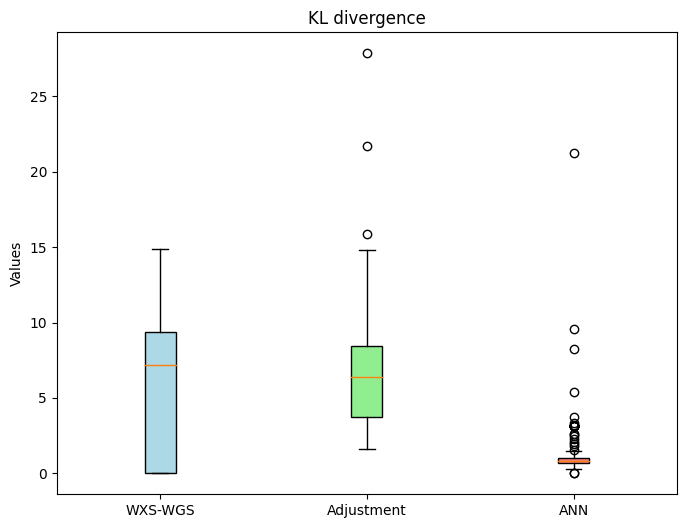

In [143]:
# Creazione della figura e degli assi
fig, ax = plt.subplots(figsize=(8, 6))

# Creazione dei boxplot
boxplot1 = ax.boxplot(D_kl_val, positions=[1], patch_artist=True)
boxplot2 = ax.boxplot(D_ADJ_val, positions=[2], patch_artist=True)
boxplot3 = ax.boxplot(D_kl_ann_val, positions=[3], patch_artist=True)

# Personalizzazione dei colori
colors = ['lightblue', 'lightgreen', 'lightcoral']
for box, color in zip([boxplot1, boxplot2, boxplot3], colors):
    for patch in box['boxes']:
        patch.set_facecolor(color)

# Aggiunta di etichette e titoli
ax.set_xticks([1, 2, 3])
ax.set_xticklabels(['WXS-WGS', 'Adjustment', 'ANN'])
ax.set_ylabel('Values')
ax.set_title('KL divergence')

# Mostrare il grafico
plt.show()

VALIDATION 5 RECA->95

In [144]:
input_val=INPUT_EXP_7.iloc[667:762,:]
target_val=TARGET_7.iloc[667:762,:]

In [145]:
df1=pd.concat([INPUT_EXP_7.iloc[0:667,:],TARGET_7.iloc[0:667,:]],axis=1)

In [146]:
df2=pd.concat([INPUT_EXP_7.iloc[762:902,:],TARGET_7.iloc[762:902,:]],axis=1)

In [147]:
df=df1.append(df2)

<ipython-input-147-a9d981095968>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df1.append(df2)


In [148]:
df_shuffled=shuffle(df,random_state=42)

In [149]:
input_matrix=df_shuffled.iloc[:,0:79]

In [150]:
target=df_shuffled.iloc[:,79:158]

In [151]:

import torch
import torch.nn as nn
seed = 42
torch.manual_seed(seed)
np.random.seed(seed)

# Definisci la tua rete neurale
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NeuralNetwork, self).__init__()
        self.hidden_layer = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.output_layer = nn.Linear(hidden_size, output_size)
        self.log_softmax = nn.LogSoftmax(dim=1)  # Usa LogSoftmax per ottenere log-probabilità

    def forward(self, x):
        x = self.hidden_layer(x)
        x = self.relu(x)
        x = self.output_layer(x)
        x = self.log_softmax(x)
        return x

# Parametri della rete
input_size = 79
hidden_size = 128
output_size = 79
torch.manual_seed(seed)
np.random.seed(seed)
# Crea l'istanza della rete
net = NeuralNetwork(input_size, hidden_size, output_size)

criterion = nn.KLDivLoss(reduction='batchmean')
optimizer = torch.optim.Adam(net.parameters(), lr=0.001)

# I dati di input e output
# Supponendo che i tuoi dati siano tensori PyTorch, assicurati di adattare questa parte in base al tuo caso specifico
input_data = torch.tensor(input_matrix.values).float()
output_data = torch.tensor(target.values)

# Addestramento della rete
for epoch in range(1000):
    optimizer.zero_grad()
    outputs = net(input_data)
    loss = criterion(outputs, output_data)
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print(f'Epoch {epoch+1}/{1000}, Loss: {loss.item()}')



Epoch 1/1000, Loss: 1.804053861012112
Epoch 11/1000, Loss: 1.7561314071577352
Epoch 21/1000, Loss: 1.6986264070565147
Epoch 31/1000, Loss: 1.624432084612799
Epoch 41/1000, Loss: 1.5347644695783196
Epoch 51/1000, Loss: 1.4416375626016298
Epoch 61/1000, Loss: 1.361702305904728
Epoch 71/1000, Loss: 1.3015585241957541
Epoch 81/1000, Loss: 1.2541174813793687
Epoch 91/1000, Loss: 1.211137568243308
Epoch 101/1000, Loss: 1.1675689437939067
Epoch 111/1000, Loss: 1.1208338793038637
Epoch 121/1000, Loss: 1.0711597464405074
Epoch 131/1000, Loss: 1.0200303408955158
Epoch 141/1000, Loss: 0.9692058473694711
Epoch 151/1000, Loss: 0.9206844011081061
Epoch 161/1000, Loss: 0.87612502020623
Epoch 171/1000, Loss: 0.8365456262412565
Epoch 181/1000, Loss: 0.8022558396525892
Epoch 191/1000, Loss: 0.7730141802762323
Epoch 201/1000, Loss: 0.74830216499898
Epoch 211/1000, Loss: 0.7275134300098351
Epoch 221/1000, Loss: 0.710021498429614
Epoch 231/1000, Loss: 0.6952437112716442
Epoch 241/1000, Loss: 0.682654843267

In [152]:
input_data_VAL = torch.tensor(input_val.values).float()

In [153]:
OUTPUT_VAL=net(input_data_VAL)

In [154]:
OUTPUT_VAL_ex= torch.exp(OUTPUT_VAL)

In [155]:
OUTPUT_VAL_PD=pd.DataFrame(OUTPUT_VAL_ex.detach().numpy())

In [156]:
OUTPUT_VAL_PD.columns=COSMIC_SIGNATURE.columns
OUTPUT_VAL_PD.index=input_val.index

In [157]:
#CALCOLO KL DIVERGENCE PRE AGGIUSTAMENTO
D_KL=np.zeros(95)
for i in range(95):
  D_KL[i]=np.sum(target_val.iloc[i,:]*np.log(target_val.iloc[i,:]/INPUT_EXP_7.iloc[i+667,:]))

In [158]:
np.mean(D_KL)

11.746532912435116

In [159]:
D_KL_ANN=np.zeros(95)
for i in range(95):
  D_KL_ANN[i]=np.sum(target_val.iloc[i,:]*np.log(target_val.iloc[i,:]/OUTPUT_VAL_PD.iloc[i,:]))

In [160]:
np.mean(D_KL_ANN)

1.8271172624128147

METODO CORRETTIVO

In [161]:
MATRIX_adjusted_VAL=MATRIX_7.iloc[667:762,:].copy()

In [162]:
for i in range(MATRIX_adjusted_VAL.shape[1]):
  MATRIX_adjusted_VAL.iloc[:,i]=(MATRIX_7.iloc[667:762,i]*rapporti[triplette_96[i]])+np.mean(MATRIX_7.iloc[667:762,i])

In [163]:
MATRIX_adjusted_VAL=MATRIX_adjusted_VAL.T

In [164]:
# Calcolare la somma di ogni colonna
sum_columns =MATRIX_adjusted_VAL.sum()


In [165]:
# Normalizzare ogni colonna dividendo per la somma della colonna
MATRIX_adjusted_VAL= MATRIX_adjusted_VAL.divide(sum_columns)

In [166]:
import cvxpy as cp
import numpy as np


n, m = 79, 95
X = COSMIC_SIGNATURE.values
Y = MATRIX_adjusted_VAL.values

w = cp.Variable((n, m))

# Vincoli
constraints = [
    w >= 0,
    cp.sum(w, axis=0) == np.ones(m),

]



# (minimizzazione degli scarti quadratici)
objective = cp.Minimize(cp.norm(Y - X @ w , 'fro')+0.01*cp.norm(w, 1))

problem = cp.Problem(objective, constraints)

problem.solve()

coefficients_WE_adj_VAL = w.value
print("Coefficients:", coefficients_WE_adj_VAL)

Coefficients: [[3.18315031e-02 4.10142579e-02 6.66358974e-02 ... 1.71563057e-12
  2.89409028e-02 9.02410772e-02]
 [6.61113887e-04 1.79355267e-02 7.91743647e-03 ... 1.78906469e-02
  1.87018903e-13 2.70328766e-02]
 [1.57961424e-11 4.31781133e-02 2.96045424e-02 ... 1.70978744e-03
  1.12984071e-01 9.93784569e-02]
 ...
 [8.13081657e-13 2.13637343e-02 6.36268080e-13 ... 2.32664755e-02
  3.27032852e-03 3.79181794e-02]
 [5.91297388e-13 5.58662060e-13 1.55147216e-12 ... 6.92423739e-13
  2.08237322e-12 9.70154627e-13]
 [1.85935709e-12 7.72878485e-13 1.21503552e-12 ... 9.54593185e-13
  7.93578490e-13 1.86647065e-12]]


In [167]:
coefficients_WE_adj_VAL=pd.DataFrame(coefficients_WE_adj_VAL)

In [168]:
coefficients_WE_adj_VAL.index=COSMIC_SIGNATURE.columns

In [169]:
coefficients_WE_adj_VAL.columns=MATRIX_adjusted_VAL.columns

In [170]:
##BOXPLOT DELLE VARIE DIFFERENZE in termini di KL DIVERGENCE
D_ADJ_val=np.zeros(95)
for i in range(95):
  D_ADJ_val[i]=np.sum(target_val.iloc[i,:]*np.log(target_val.iloc[i,:]/coefficients_WE_adj_VAL.iloc[:,i]))
np.mean(D_ADJ_val)

5.973852338720503

In [171]:
D_kl_val=np.zeros(95)
for i in range(95):
  D_kl_val[i]=np.sum(target_val.iloc[i,:]*np.log(target_val.iloc[i,:]/INPUT_EXP_7.iloc[i+667,:]))
np.mean(D_kl_val)

11.746532912435116

In [172]:
D_kl_ann_val=np.zeros(95)
for i in range(95):
  D_kl_ann_val[i]=np.sum(target_val.iloc[i,:]*np.log(target_val.iloc[i,:]/OUTPUT_VAL_PD.iloc[i,:]))
np.mean(D_kl_ann_val)

1.8271172624128147

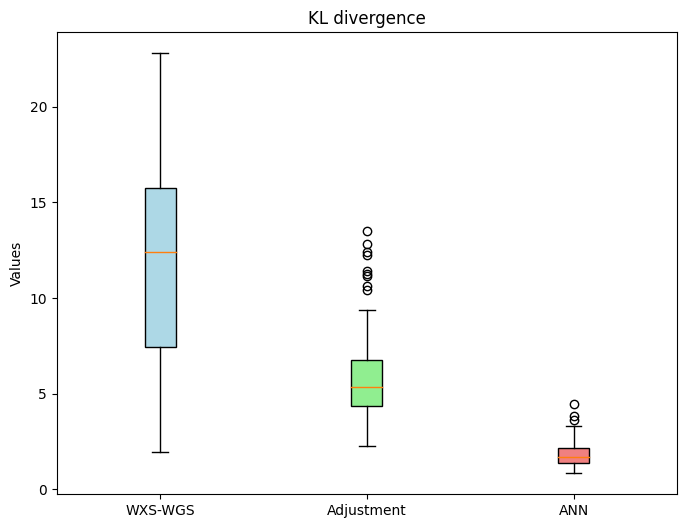

In [173]:
# Creazione della figura e degli assi
fig, ax = plt.subplots(figsize=(8, 6))

# Creazione dei boxplot
boxplot1 = ax.boxplot(D_kl_val, positions=[1], patch_artist=True)
boxplot2 = ax.boxplot(D_ADJ_val, positions=[2], patch_artist=True)
boxplot3 = ax.boxplot(D_kl_ann_val, positions=[3], patch_artist=True)

# Personalizzazione dei colori
colors = ['lightblue', 'lightgreen', 'lightcoral']
for box, color in zip([boxplot1, boxplot2, boxplot3], colors):
    for patch in box['boxes']:
        patch.set_facecolor(color)

# Aggiunta di etichette e titoli
ax.set_xticks([1, 2, 3])
ax.set_xticklabels(['WXS-WGS', 'Adjustment', 'ANN'])
ax.set_ylabel('Values')
ax.set_title('KL divergence')

# Mostrare il grafico
plt.show()

VALIDATION 6 skca ->100

In [174]:
input_val=INPUT_EXP_7.iloc[762:862,:]
target_val=TARGET_7.iloc[762:862,:]

In [175]:
df1=pd.concat([INPUT_EXP_7.iloc[0:762,:],TARGET_7.iloc[0:762,:]],axis=1)

In [176]:
df2=pd.concat([INPUT_EXP_7.iloc[862:902,:],TARGET_7.iloc[862:902,:]],axis=1)

In [177]:
df=df1.append(df2)
df_shuffled=shuffle(df,random_state=42)

<ipython-input-177-842f84aa58db>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df1.append(df2)


In [178]:
input_matrix=df_shuffled.iloc[:,0:79]

In [179]:
target=df_shuffled.iloc[:,79:158]

In [180]:

import torch
import torch.nn as nn
seed = 42
torch.manual_seed(seed)
np.random.seed(seed)
# Definisci la tua rete neurale
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NeuralNetwork, self).__init__()
        self.hidden_layer = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.output_layer = nn.Linear(hidden_size, output_size)
        self.log_softmax = nn.LogSoftmax(dim=1)  # Usa LogSoftmax per ottenere log-probabilità

    def forward(self, x):
        x = self.hidden_layer(x)
        x = self.relu(x)
        x = self.output_layer(x)
        x = self.log_softmax(x)
        return x

# Parametri della rete
input_size = 79
hidden_size = 128
output_size = 79
torch.manual_seed(seed)
np.random.seed(seed)
# Crea l'istanza della rete
net = NeuralNetwork(input_size, hidden_size, output_size)

criterion = nn.KLDivLoss(reduction='batchmean')
optimizer = torch.optim.Adam(net.parameters(), lr=0.001)

# I dati di input e output
# Supponendo che i tuoi dati siano tensori PyTorch, assicurati di adattare questa parte in base al tuo caso specifico
input_data = torch.tensor(input_matrix.values).float()
output_data = torch.tensor(target.values)

# Addestramento della rete
for epoch in range(1000):
    optimizer.zero_grad()
    outputs = net(input_data)
    loss = criterion(outputs, output_data)
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print(f'Epoch {epoch+1}/{1000}, Loss: {loss.item()}')



Epoch 1/1000, Loss: 1.7564718813047175
Epoch 11/1000, Loss: 1.7094094209968564
Epoch 21/1000, Loss: 1.6521555361094424
Epoch 31/1000, Loss: 1.5766436548835367
Epoch 41/1000, Loss: 1.4841822225814199
Epoch 51/1000, Loss: 1.388412647542959
Epoch 61/1000, Loss: 1.3096258300778052
Epoch 71/1000, Loss: 1.2566317348864802
Epoch 81/1000, Loss: 1.2209840644539534
Epoch 91/1000, Loss: 1.191057581943393
Epoch 101/1000, Loss: 1.1614000399770945
Epoch 111/1000, Loss: 1.129585718849629
Epoch 121/1000, Loss: 1.0951229695110147
Epoch 131/1000, Loss: 1.0584179912212655
Epoch 141/1000, Loss: 1.020302689364909
Epoch 151/1000, Loss: 0.981967508666754
Epoch 161/1000, Loss: 0.9447090636459873
Epoch 171/1000, Loss: 0.9096422276041248
Epoch 181/1000, Loss: 0.8775050364875395
Epoch 191/1000, Loss: 0.8486549340639364
Epoch 201/1000, Loss: 0.8232135123160359
Epoch 211/1000, Loss: 0.8010119920004353
Epoch 221/1000, Loss: 0.781752875386494
Epoch 231/1000, Loss: 0.7650631032992438
Epoch 241/1000, Loss: 0.750540842

In [181]:
input_data_VAL = torch.tensor(input_val.values).float()

In [182]:
OUTPUT_VAL=net(input_data_VAL)

In [183]:
OUTPUT_VAL_ex= torch.exp(OUTPUT_VAL)

In [184]:
OUTPUT_VAL_PD=pd.DataFrame(OUTPUT_VAL_ex.detach().numpy())

In [185]:
OUTPUT_VAL_PD.columns=COSMIC_SIGNATURE.columns
OUTPUT_VAL_PD.index=input_val.index

In [186]:
#CALCOLO KL DIVERGENCE PRE AGGIUSTAMENTO
D_KL=np.zeros(100)
for i in range(100):
  D_KL[i]=np.sum(target_val.iloc[i,:]*np.log(target_val.iloc[i,:]/INPUT_EXP_7.iloc[i+762,:]))

In [187]:
np.mean(D_KL)

5.147715627353791

In [188]:
D_KL_ANN=np.zeros(100)
for i in range(100):
  D_KL_ANN[i]=np.sum(target_val.iloc[i,:]*np.log(target_val.iloc[i,:]/OUTPUT_VAL_PD.iloc[i,:]))

In [189]:
np.mean(D_KL_ANN)

1.5387006910412817

METODO CORRETTIVO

In [190]:
MATRIX_adjusted_VAL=MATRIX_7.iloc[762:862,:].copy()

In [191]:
for i in range(MATRIX_adjusted_VAL.shape[1]):
  MATRIX_adjusted_VAL.iloc[:,i]=(MATRIX_7.iloc[762:862,i]*rapporti[triplette_96[i]])+np.mean(MATRIX_7.iloc[762:862,i])

In [192]:
MATRIX_adjusted_VAL=MATRIX_adjusted_VAL.T

In [193]:
# Calcolare la somma di ogni colonna
sum_columns =MATRIX_adjusted_VAL.sum()


In [194]:
# Normalizzare ogni colonna dividendo per la somma della colonna
MATRIX_adjusted_VAL= MATRIX_adjusted_VAL.divide(sum_columns)

In [195]:
MATRIX_adjusted_VAL

,762,763,764,765,766,767,768,769,770,771,...,852,853,854,855,856,857,858,859,860,861
A[C>A]A,0.005169,0.004265,0.003392,0.007168,0.008472,0.009623,0.006698,0.005615,0.002002,0.004949,...,0.004841,0.003501,0.003315,0.011317,0.002200,0.004168,0.015654,0.006539,0.006467,0.003308
A[C>A]C,0.001582,0.001429,0.002590,0.002194,0.005717,0.001566,0.001263,0.001495,0.001089,0.002138,...,0.001289,0.001254,0.000886,0.001848,0.001008,0.002267,0.002698,0.003537,0.001979,0.001496
A[C>A]G,0.000474,0.000695,0.000439,0.000658,0.006264,0.000339,0.000615,0.000727,0.000326,0.000641,...,0.001364,0.000376,0.000578,0.000554,0.000306,0.000680,0.000584,0.001305,0.000593,0.001584
A[C>A]T,0.001348,0.000842,0.001249,0.000797,0.000466,0.002624,0.001747,0.000881,0.000395,0.001822,...,0.000759,0.000455,0.000322,0.000671,0.000170,0.000823,0.000708,0.000727,0.000719,0.000882
A[C>G]A,0.002564,0.002067,0.002375,0.001155,0.003017,0.001008,0.001827,0.001277,0.000970,0.003465,...,0.001863,0.001118,0.001112,0.000973,0.000930,0.001193,0.001026,0.001783,0.001764,0.002164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
T[T>C]T,0.003621,0.005309,0.005424,0.005795,0.012908,0.013376,0.005415,0.004694,0.008645,0.007158,...,0.004786,0.002427,0.004216,0.003576,0.003885,0.005188,0.003773,0.007407,0.006627,0.004699
T[T>G]A,0.000733,0.001074,0.000679,0.001016,0.002877,0.003341,0.000949,0.001123,0.001279,0.001750,...,0.001712,0.000581,0.001670,0.000856,0.001050,0.001050,0.000903,0.001638,0.000916,0.001124
T[T>G]C,0.000901,0.002648,0.001673,0.001250,0.002199,0.002585,0.001168,0.001382,0.001866,0.003052,...,0.001191,0.001073,0.000758,0.001053,0.001205,0.001291,0.001111,0.001140,0.001693,0.001383
T[T>G]G,0.002180,0.003874,0.004160,0.002382,0.003268,0.004203,0.002226,0.003343,0.001183,0.002946,...,0.003493,0.003927,0.001479,0.003626,0.000783,0.003124,0.009521,0.003342,0.003884,0.002637


In [196]:
import cvxpy as cp
import numpy as np


n, m = 79, 100
X = COSMIC_SIGNATURE.values
Y = MATRIX_adjusted_VAL.values

w = cp.Variable((n, m))

# Vincoli
constraints = [
    w >= 0,
    cp.sum(w, axis=0) == np.ones(m),

]



# (minimizzazione degli scarti quadratici)
objective = cp.Minimize(cp.norm(Y - X @ w , 'fro')+0.01*cp.norm(w, 1))

problem = cp.Problem(objective, constraints)

problem.solve()

coefficients_WE_adj_VAL = w.value
print("Coefficients:", coefficients_WE_adj_VAL)

Coefficients: [[6.86962082e-13 8.39259526e-03 3.08088336e-11 ... 3.40708611e-02
  1.54224243e-02 1.42621508e-12]
 [1.49698690e-13 3.06886728e-14 6.92348232e-14 ... 4.39896534e-14
  6.97253104e-14 2.88130404e-14]
 [4.80935561e-12 2.25056893e-12 7.08386195e-13 ... 1.52203615e-12
  2.07808242e-12 1.40773031e-12]
 ...
 [2.33102537e-12 4.30863028e-12 8.23298181e-13 ... 2.07890135e-12
  2.20429215e-12 1.23018154e-12]
 [5.70036531e-12 1.55545242e-12 1.43775375e-12 ... 1.01184480e-12
  2.01232660e-12 1.75651569e-12]
 [7.06461099e-12 2.27719911e-12 6.74677353e-13 ... 8.51593754e-13
  1.90177431e-12 1.70418000e-12]]


In [197]:
coefficients_WE_adj_VAL=pd.DataFrame(coefficients_WE_adj_VAL)

In [198]:
coefficients_WE_adj_VAL.index=COSMIC_SIGNATURE.columns

In [199]:
coefficients_WE_adj_VAL.columns=MATRIX_adjusted_VAL.columns

In [200]:
##BOXPLOT DELLE VARIE DIFFERENZE in termini di KL DIVERGENCE
D_ADJ_val=np.zeros(100)
for i in range(100):
  D_ADJ_val[i]=np.sum(target_val.iloc[i,:]*np.log(target_val.iloc[i,:]/coefficients_WE_adj_VAL.iloc[:,i]))
np.mean(D_ADJ_val)

6.146912698641399

In [201]:
D_kl_val=np.zeros(100)
for i in range(100):
   D_kl_val[i]=np.sum(target_val.iloc[i,:]*np.log(target_val.iloc[i,:]/INPUT_EXP_7.iloc[i+762,:]))
np.mean(D_kl_val)

5.147715627353791

In [202]:
D_kl_ann_val=np.zeros(100)
for i in range(100):
  D_kl_ann_val[i]=np.sum(target_val.iloc[i,:]*np.log(target_val.iloc[i,:]/OUTPUT_VAL_PD.iloc[i,:]))
np.mean(D_kl_ann_val)

1.5387006910412817

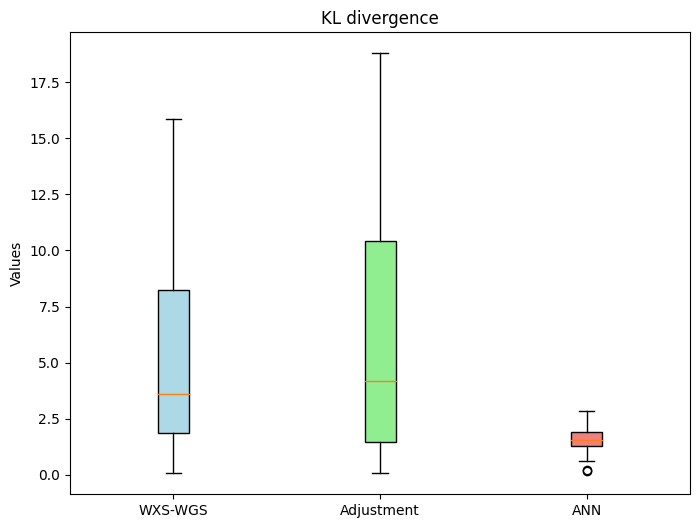

In [203]:
# Creazione della figura e degli assi
fig, ax = plt.subplots(figsize=(8, 6))

# Creazione dei boxplot
boxplot1 = ax.boxplot(D_kl_val, positions=[1], patch_artist=True)
boxplot2 = ax.boxplot(D_ADJ_val, positions=[2], patch_artist=True)
boxplot3 = ax.boxplot(D_kl_ann_val, positions=[3], patch_artist=True)

# Personalizzazione dei colori
colors = ['lightblue', 'lightgreen', 'lightcoral']
for box, color in zip([boxplot1, boxplot2, boxplot3], colors):
    for patch in box['boxes']:
        patch.set_facecolor(color)

# Aggiunta di etichette e titoli
ax.set_xticks([1, 2, 3])
ax.set_xticklabels(['WXS-WGS', 'Adjustment', 'ANN'])
ax.set_ylabel('Values')
ax.set_title('KL divergence')

# Mostrare il grafico
plt.show()